# TwoSix Armory with ART Increment 2 Demo


Here we explore how the archetypal Test and Evaluation (T&E) engineer, Jay, can
use Armory to answer important questions about the performance of various models
in the face of adversarial attack.

In this example, Jay applies a standard Projected Gradient Attack (PGD) imported from
the IBM Adversarial Robustness Toolbox (ART) to three models trained on the EuroSAT
dataset. The models are imported from HuggingFace's model hub via the `jatic_toolbox`.
Jay then prepares an set of Armory evaluations to compare the performance of the models.

![what-is-armory-slide.png](support/what-is-armory-slide.png)


## Motivation



Jay is trying to do cross model comparisons and it is an inherent feature of the
persona. Armory is allowing Jay to understand the relative performance of models in the face of adversarial attack under varying parameters.

This activity is interpretive and exploratory. Jay is not trying to make a
decision, but rather understand the performance of the models under attack.

IBM demonstrated auto-attack, Armory suite provides tools for meta-analysis of
pre-computed adversarial evaluation results.

The mechanism for performing cross-model comparisons using Armory is simple:

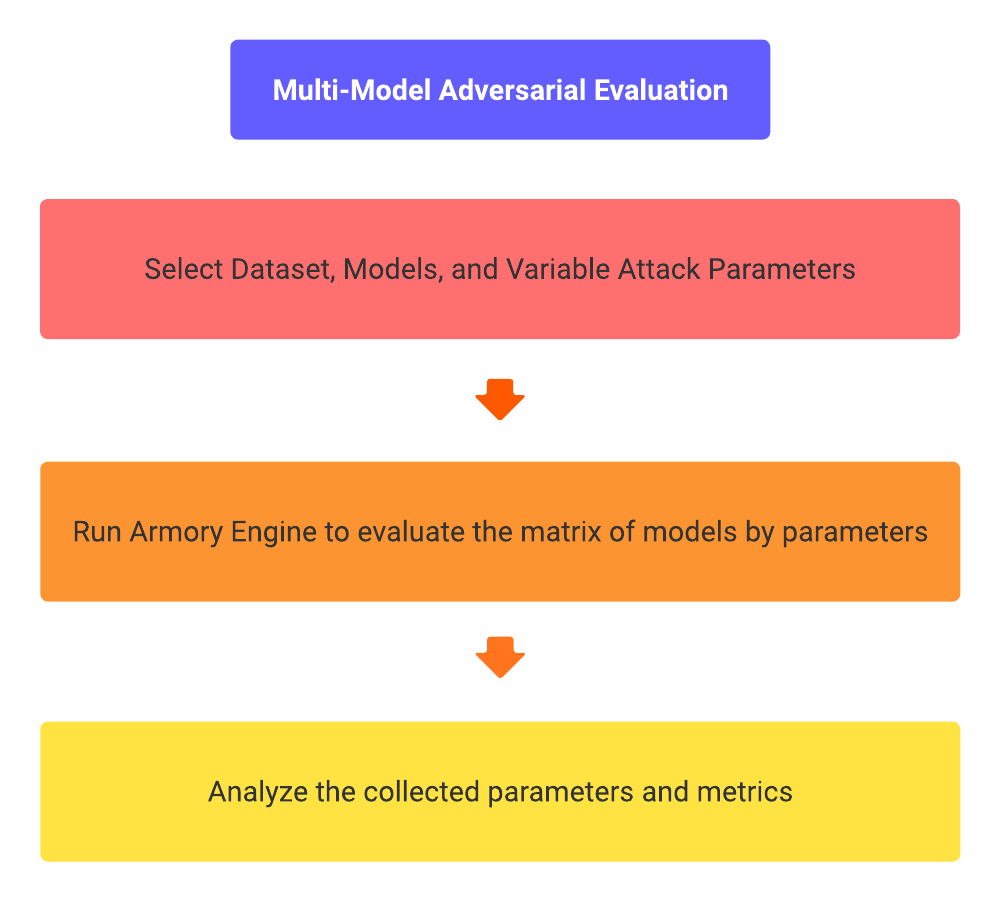


## Meta-Analysis of pre-computed Adversarial Evaluations

This notebook shows cross-model comparisons as afforded by armory-libarary and armory suite. Thus, no Armory/ART evaluations are contained here, but rather the logged parameters and metrics of over 180+ separate Armory evaluations are analyzed here.

The ML test and evaluation performer, Jay, will be looking to answer two questions about adversarial evaluations:

1. What are the relevant differences in categorical accuracy of three different models?
2. What are the relative and absolute costs of performing an adversarial attacks against the three models?

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
df = pd.read_csv("eurosat_model_eval_09102023.csv")

## Linear Regression


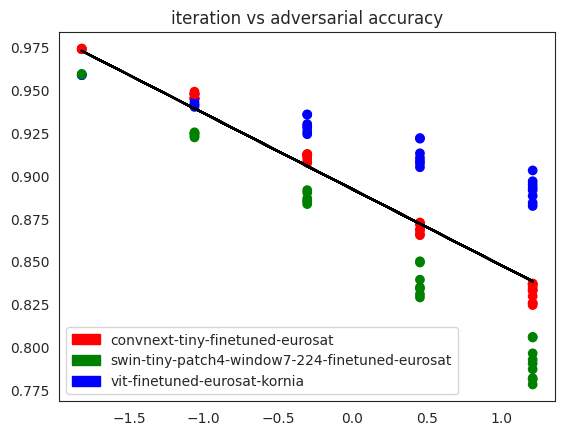

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


features = ['ProjectedGradientDescent.eps', 'ProjectedGradientDescent.eps_step','ProjectedGradientDescent.max_iter']
x = df.loc[:, features].values
y = df.loc[:,['adversarial_mean_categorical_accuracy']].values
x = StandardScaler().fit_transform(x)

model1 = LinearRegression()
model1.fit(x[:,2].reshape(-1, 1), y)
colors = {'mrm8488/convnext-tiny-finetuned-eurosat':'red', 'nielsr/swin-tiny-patch4-window7-224-finetuned-eurosat':'green',
           'nielsr/vit-finetuned-eurosat-kornia':'blue'}
plt.scatter(x[:,2].reshape(-1, 1), y.reshape(-1, 1),c=df.loc[:, 'load_model.model_name'].map(colors))

plt.plot(x[:,2], model1.predict(x[:,2].reshape(-1, 1)),color='k')
plt.title('iteration vs adversarial accuracy')
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='convnext-tiny-finetuned-eurosat')
green_patch = mpatches.Patch(color='green', label='swin-tiny-patch4-window7-224-finetuned-eurosat')
blue_patch = mpatches.Patch(color='blue', label='vit-finetuned-eurosat-kornia')
plt.legend(handles=[red_patch,green_patch,blue_patch])
plt.show()



This analysis shows that the categorical accuracy of the three models is highly correlated. This is not surprising, as all three models are trained on the same dataset. The linear regression shows a strong correlation between adversarial iterations and decreasing performance. Also, as the number of adversarial iterations increases, the adversarial accuracy between the models diverges into a tri-modal distribution.

## Adversarial Accuracy

This analysis shows that under

* a specific attack (PGD)
* with a constant epsilon attenuation factor
* across three distinct models

that there are real differences in the adversarial accuracy of the models. The adversarial accuracy of the models is not the same, and the models are not equally robust to the attack.

# Conclusion

Now Jay, after running these analyses, can take away the measured differences between
the models of interest and conclude that the `vit-finetune-eurosat-kornia` model is
significantly more robust to the attack than the other two models.